In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from scipy.signal import convolve2d
import time

2024-10-29 15:59:48.973150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
print("Loading Fashion MNIST dataset...")
(X_train, y_train), (_, _) = fashion_mnist.load_data()
X_train = X_train / 255.0

Loading MNIST dataset...


In [ ]:
class Conv5x5:
    
    def __init__(self, num_filters):
        self.num_filters = num_filters
        self.filters = np.random.randn(num_filters, 5, 5) / 25

    def iterate_regions(self, image):
        h, w = image.shape
        
        for i in range(h - 4):
            for j in range(w - 4):
                im_region = image[i:(i + 5), j:(j + 5)]
                yield im_region, i, j
                
    def forward(self, input):
        h, w = input.shape
        output = np.zeros((h - 4, w - 4, self.num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))
            
        return output


In [ ]:
class MaxPool2:
    
    def iterate_regions(self, image):
        h, w, _ = image.shape
        new_h = h // 2
        new_w = w // 2
        
        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
                yield im_region, i, j

    def forward(self, input):
        h, w, num_filters = input.shape
        output = np.zeros((h // 2, w // 2, num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.amax(im_region, axis=(0, 1))
            
        return output
        

In [28]:
import numpy as np

conv = Conv3x3(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8
softmax = Softmax(13 * 13 * 8, 10) # 13x13x8 -> 10

def forward(image, label):
    out = conv.forward((image / 255) - 0.5)
    out = pool.forward(out)
    out = softmax.forward(out)
    
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0
    
    return out, loss, acc

print('Fashion MNIST CNN initialized!')

loss = 0
num_correct = 0
for i, (im, label) in enumerate(zip(X_test, y_test)):
    _, l, acc = forward(im, label)
    loss += l
    num_correct += acc
    
    if i % 100 == 99:
        print(
            '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
            (i + 1, loss / 100, num_correct)
    )
        loss = 0
        num_correct = 0

In [29]:
def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='same')

In [30]:
def show_feature_maps(digit_idx=None):
    if digit_idx is None:
        digit_idx = np.random.randint(0, len(X_train))

    image = X_train[digit_idx]
    digit = y_train[digit_idx]

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'CNN Feature Detection - MNIST Digit: {digit}', fontsize=16)

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for idx, (name, kernel) in enumerate(kernels.items(), 1):
        axes[0, idx].imshow(kernel, cmap='coolwarm')
        axes[0, idx].set_title(f'Kernel: {name}')
        axes[0, idx].axis('off')

        result = apply_convolution(image, kernel)
        result = (result - result.min()) / (result.max() - result.min())

        axes[1, idx].imshow(result, cmap='gray')
        axes[1, idx].set_title(f'Feature Map')
        axes[1, idx].axis('off')

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

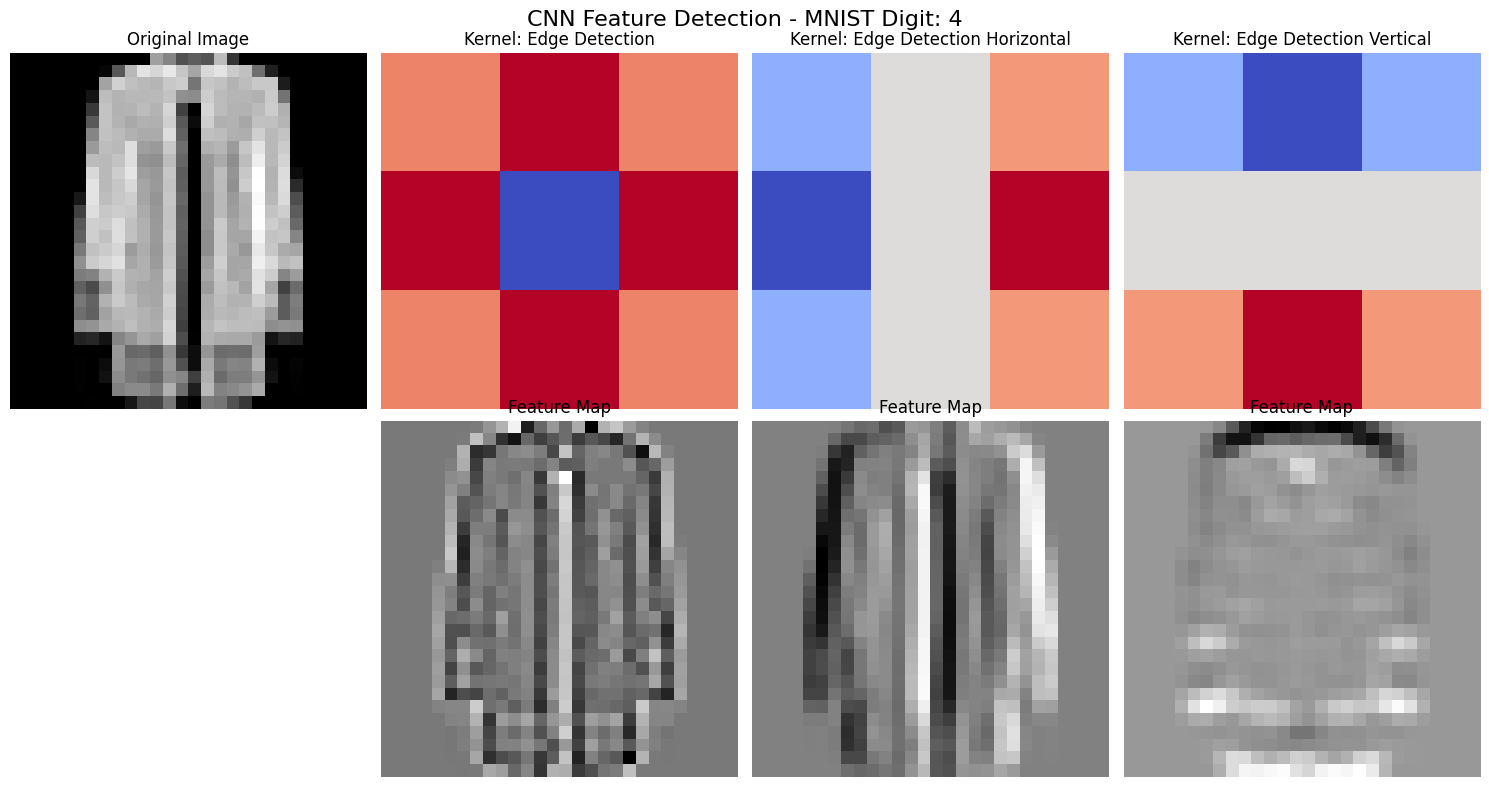

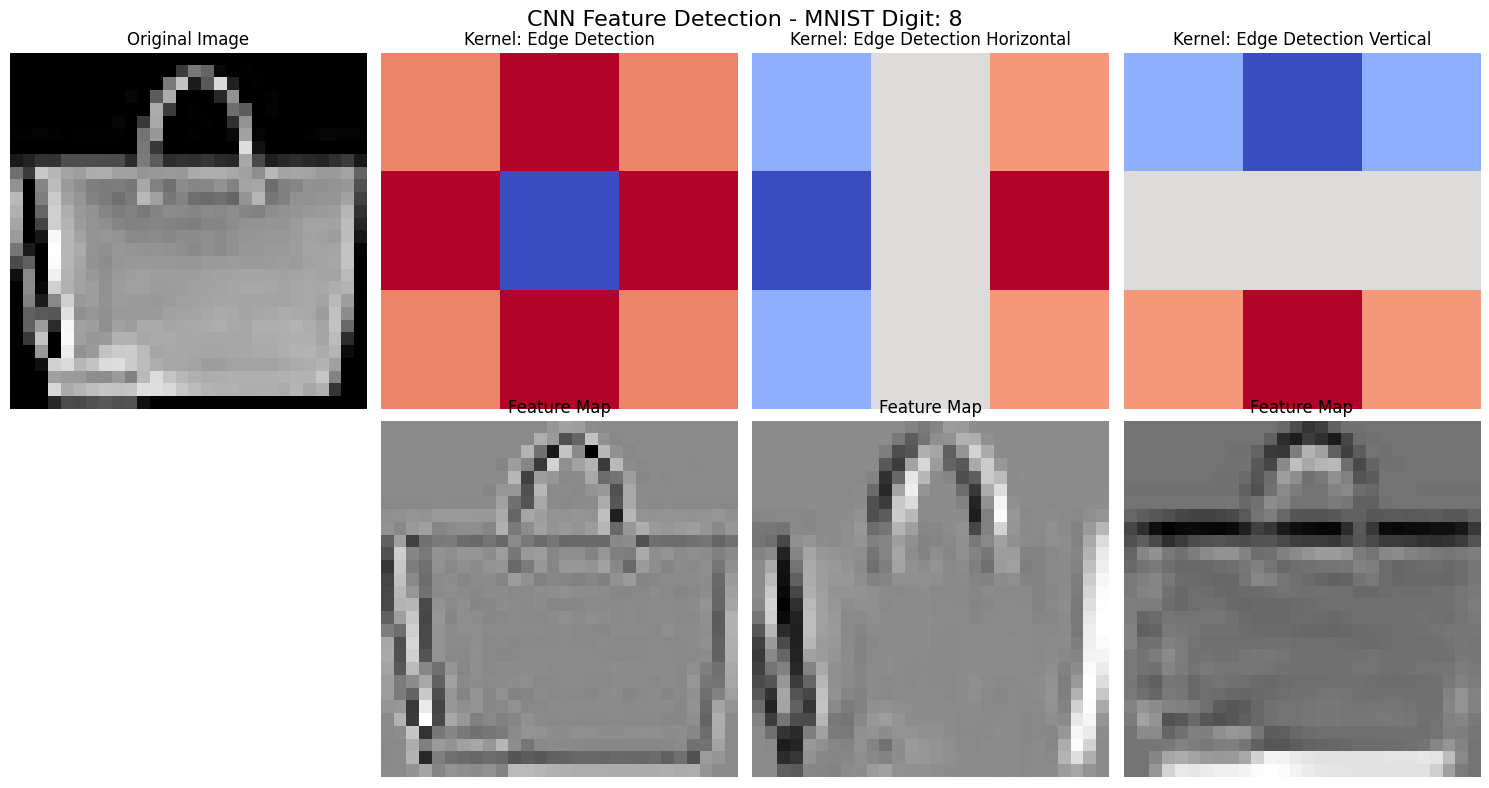

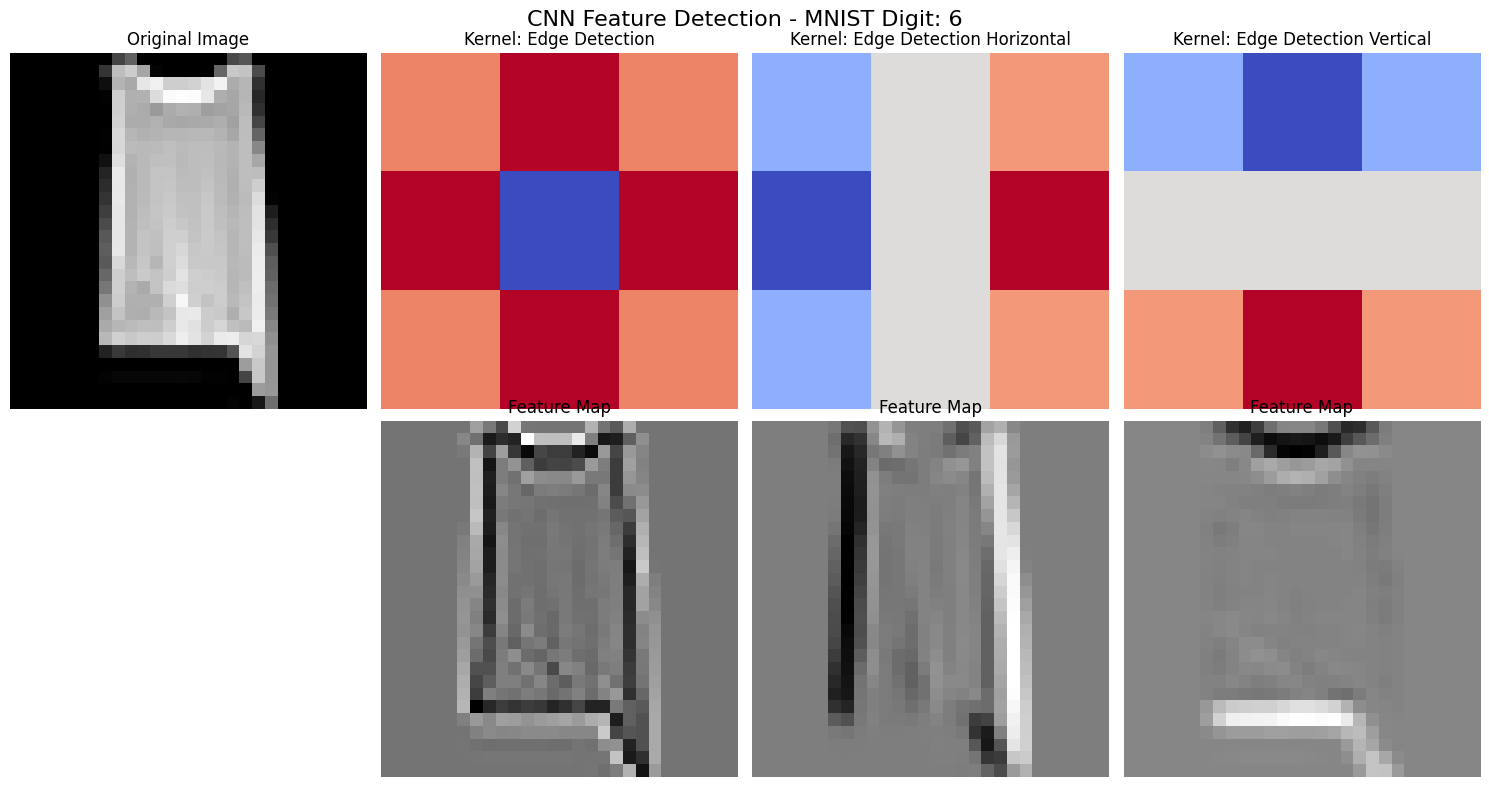

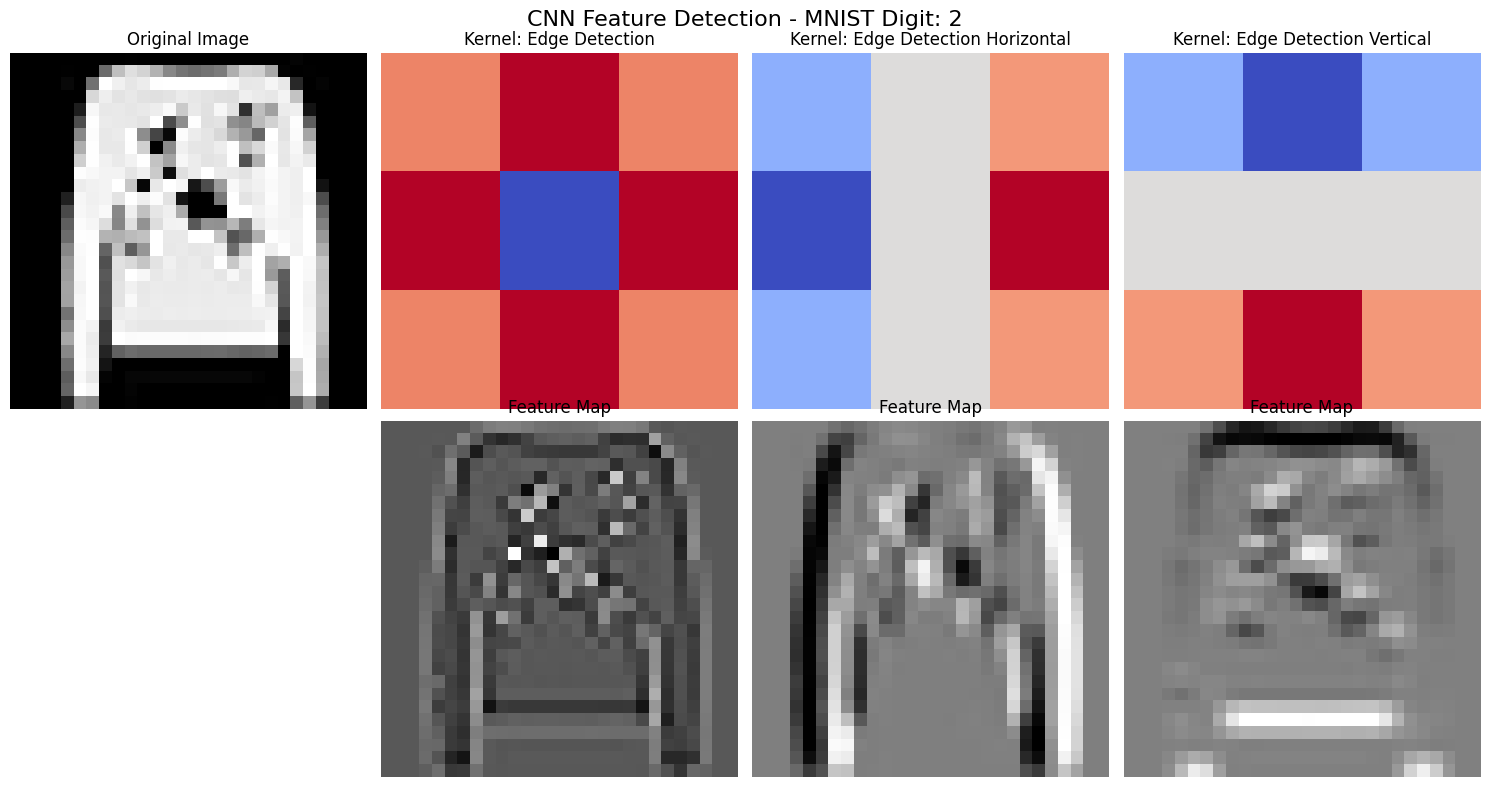

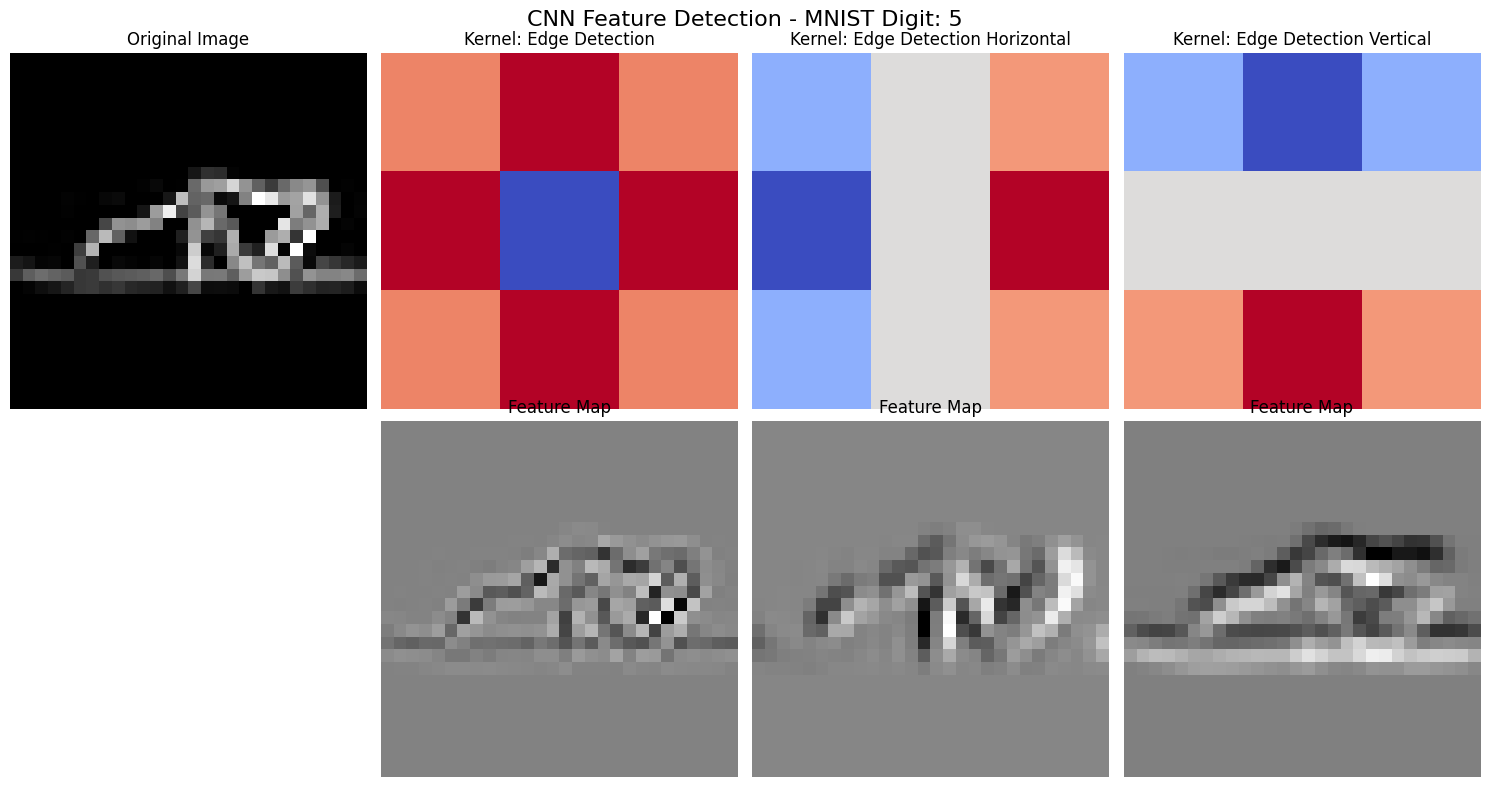

In [31]:
num_examples = 5
while num_examples > 0:
  show_feature_maps()
  time.sleep(2)
  num_examples -= 1